### Práctica Ivan de Monserrat

* Pregunta 1 - Gráficas de las medias por año de todos los paises de contaminación de NH3
* Pregunta 2 - Buscar el pais que mas drecrecio su contaminacion en el año 2010
* Pregunta 3 - Buscar la media de contaminación por persona de todos los paises, por año.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

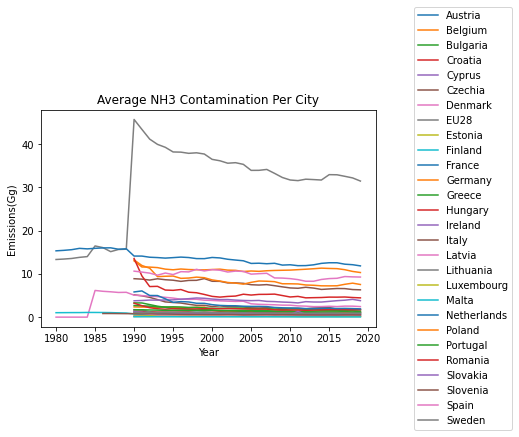

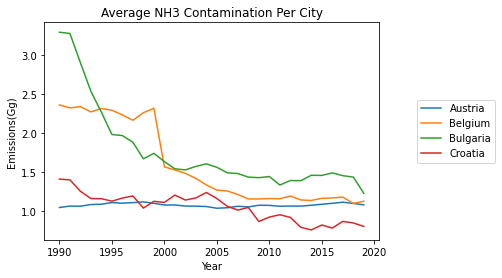

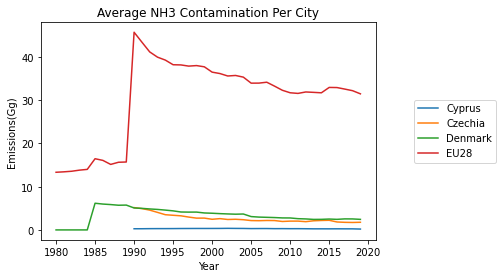

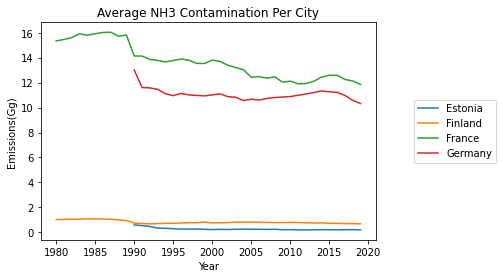

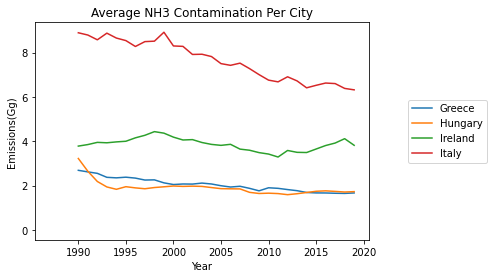

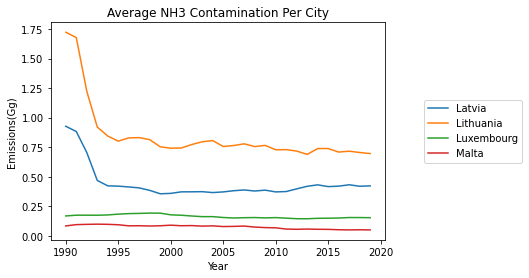

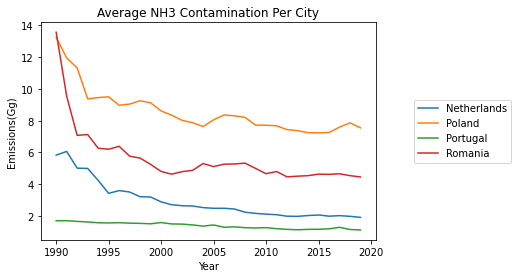

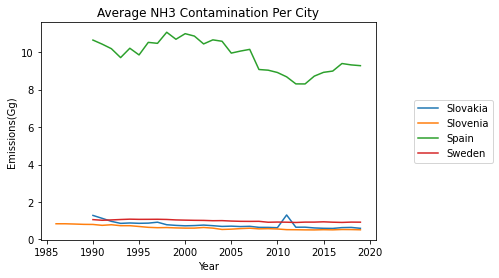

In [4]:
#1 - Gráficas de las medias por año de todos los paises de contaminación de NH3
#Importamos el CSV
e1_contamination_data: pd.DataFrame = pd.read_csv("NEC_NFR14_2021_0702.csv", sep='\t')
#Creamos una máscara para coger solo la contaminacion de tipo NH3 del dataframe
e1_nh3_mask: pd.Series = (e1_contamination_data.loc[:,'Pollutant_name'] == 'NH3') 
#Aplicamos la máscara y lo guardamos en un nuevo dataFrame
e1_contamination_data_nh3: pd.DataFrame = (e1_contamination_data.loc[e1_nh3_mask,:])
#Eliminamos todas las filas que tengan NaN en la columna de emissiones, ya que es la que vamos a estudiar en este caso
e1_contamination_data_notNanEmissions: pd.DataFrame = e1_contamination_data_nh3.dropna(subset=['Emissions'])
#Guardamos en un nuevo dataFrame las columnas de ciudad, emisiones y año
e1_contamination_data_clean: pd.DataFrame = e1_contamination_data_notNanEmissions.loc[:,['Country', 'Emissions', 'Year']]
#Agrupamos por año y por ciudades y luego calculamos la media
e1_contamination_data_clean_byYear: pd.DataFrame = e1_contamination_data_clean.groupby(['Year', 'Country']).mean()
#Reajustamos el dataFrame con la opcion pivot table, haciendo que el indice sean los años, las columnas las ciudades, y los valores las medias de las emissiones
e1_plot_table: pd.DataFrame = e1_contamination_data_clean_byYear.pivot_table(index='Year', columns='Country', values='Emissions')
#Lo ploteamos
e1_plot_table.plot(kind="line", title="Average NH3 Contamination Per City", ylabel="Emissions(Gg)").legend(loc='center left',bbox_to_anchor=(1.1, 0.5))
#Para que no se solape la grafica, haremos una grafica por cada 4 paises, recorriendo toda la array y creando la respectiva grafica para cada 4 paises
for x in range(0,27,4):
    array = e1_plot_table.columns
    graphic = e1_plot_table.loc[:,array[x:x+4]].plot(kind="line", title="Average NH3 Contamination Per City", ylabel="Emissions(Gg)").legend(loc='center left',bbox_to_anchor=(1.1, 0.5))

    

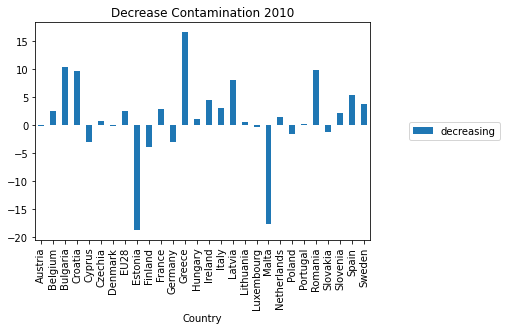

In [5]:
#2 - Buscar el pais que mas drecrecio su contaminacion en el año 2010
#Importamos el CSV
contamination_data: pd.DataFrame = pd.read_csv("NEC_NFR14_2021_0702.csv", sep='\t')

def decrease(start_value: float, end_value: float) -> float:
    minus: float = start_value - end_value
    decrease: float = (minus/start_value)*100

    return decrease

#Creamos una máscara para coger solo los datos del 2009 y 2010
e2_year_mask: pd.Series = (contamination_data.loc[:,'Year'] == 2009) | (contamination_data.loc[:,'Year'] == 2010)
#Aplicamos la máscara y lo guardamos en un nuevo dataFrame
e2_contamination_data_year_mask: pd.DataFrame = (contamination_data.loc[e2_year_mask,:]) 
#Eliminamos todas las filas que tengan NaN en la columna de emissiones, ya que es la que vamos a estudiar en este caso
e2_contamination_data_notNanEmissions: pd.DataFrame = e2_contamination_data_year_mask.dropna(subset=['Emissions'])
#Guardamos en un nuevo dataFrame las columnas de ciudad, emisiones y año
e2_contamination_data_clean: pd.DataFrame = e2_contamination_data_notNanEmissions.loc[:,['Country', 'Emissions', 'Year']]
#Agrupamos por año y por ciudades y sumamos
e2_contamination_data_clean_grouped: pd.DataFrame = e2_contamination_data_clean.groupby(['Year', 'Country']).sum()
#Reajustamos el dataFrame con la opcion pivot table, haciendo que el indice sean los años, las columnas las ciudades, y los valores las medias de las emissiones
e2_plot_table: pd.DataFrame = e2_contamination_data_clean_grouped.pivot_table(index='Year', columns='Country', values='Emissions')
#Trasnponemos el dataFrame para poder trabajar mejor con los datos
e2_plot_table_trasnposed: pd.DataFrame = e2_plot_table.T
#Assignamos una nueva columna donde estara el decrecimiento entre los dos años
e2_decrease_contamination_dataFrame: pd.DataFrame = e2_plot_table_trasnposed.assign(decreasing= lambda x: decrease(x[2009], x[2010]))
#Ahora dejamos solo la columna de decrecimiento
e2_decrease_contamination_clean: pd.DataFrame = e2_decrease_contamination_dataFrame.drop(columns=[2009, 2010])
#Y lo ploteamos
e2_decrease_contamination_clean.plot(kind="bar", title="Decrease Contamination 2010").legend(loc='center left',bbox_to_anchor=(1.1, 0.5))


#Conclusion
#Podemos ver que grecia gana con diferencia a las otras, ya que reducio mas de una 15% la contaminacion respecto al año anterior, despues de buscar un rato
# he encontrado información sobre que en 2010 grecia lanzo un plan de eco-inovation para mejorar la salud de su pais, este es el link:
# https://ec.europa.eu/environment/ecoap/sites/default/files/field/field-country-files/eio_country_brief_2010_greece.pdf




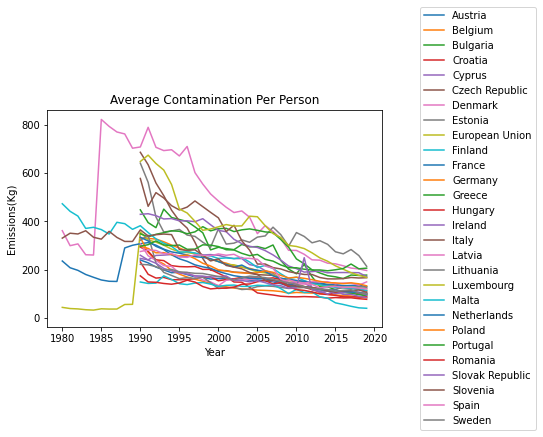

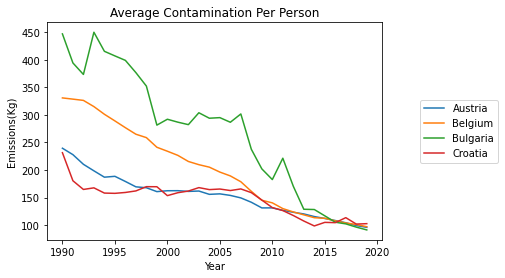

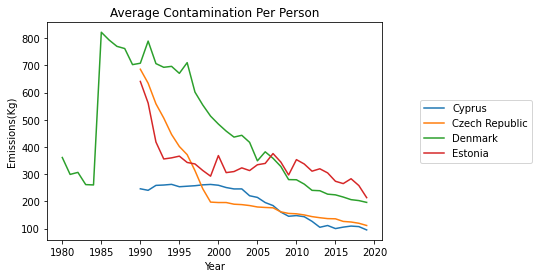

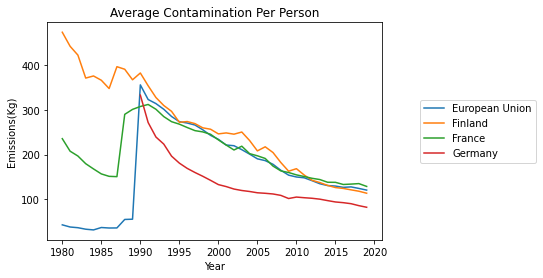

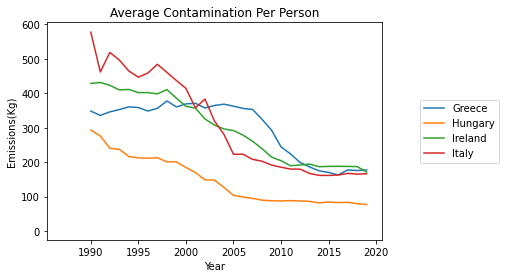

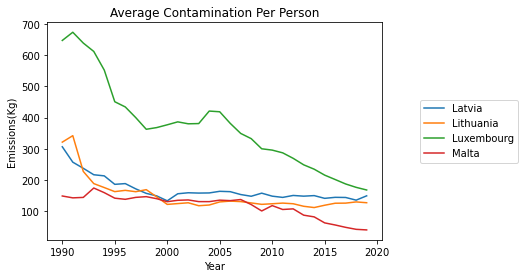

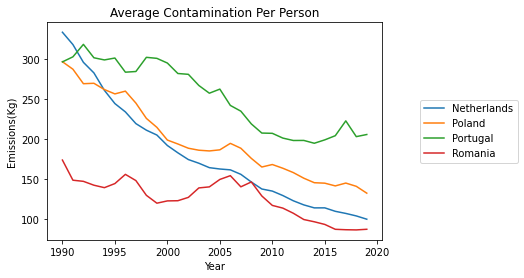

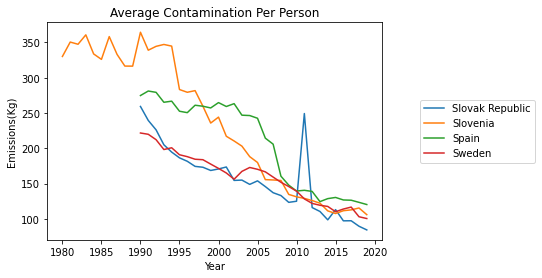

In [38]:
#3- Buscar la media de contaminación por persona de todos los paises, por año, de los 4 tipos de emisiones
#Importamos el csv de contaminación
contamination_data: pd.DataFrame = pd.read_csv("NEC_NFR14_2021_0702.csv", sep='\t')
#Importamos el csv de población de europa - https://data.worldbank.org/indicator/SP.POP.TOTL?end=1976&locations=EU-PT-SE-RO&name_desc=true&start=1976&view=bar
population_df: pd.DataFrame = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_3603750.csv")
#Eliminamos las columnas inecesarias del dataFrame de poblacion
population_raw: pd.DataFrame = population_df.drop(columns=['Country Code','Indicator Name', 'Indicator Code', 'Unnamed: 65',
                                                        '1960','1961','1962','1963','1964',
                                                        '1965','1966','1967','1968','1969','1970',
                                                        '1971','1972','1973','1974','1975','1976',
                                                        '1977','1978','1979'])
#Eliminamos las filas que contengan NaN
population_notNaN: pd.DataFrame = population_raw.dropna()
#Ponemos como indice del dataframe los nombres de las ciudades
population_clean: pd.DataFrame = population_notNaN.set_index("Country Name")

#Funcion que te devuelve la poblacion del dataframe de población pasandole el año y el nombre de la ciudad
def get_value_population(country: pd.Series, year: pd.Series) -> float:
    serie_population: pd.Series = [population_clean.loc[c, str(y)] for c,y in zip(country, year)]

    return serie_population

#Eliminamos los NaN en la columna de emissiones del dataFrame de contaminación
contamination_data_notNanEmissions: pd.DataFrame = contamination_data.dropna(subset=['Emissions'])
#Guardamos las columnas de ciudad, emissiones y año en un nuevo dataFrame
contamination_data_clean: pd.DataFrame = contamination_data_notNanEmissions.loc[:,['Country', 'Emissions', 'Year']]

#Cambiamos los nombres de ciudad del DataFrame de contaminacion que no coinciden con el nombre de ciudad del dataFrame de Población
contamination_data_clean.loc[(contamination_data_clean.loc[:,'Country'] == 'Czechia') ,'Country'] = 'Czech Republic'
contamination_data_clean.loc[(contamination_data_clean.loc[:,'Country'] == 'Slovakia') ,'Country'] = 'Slovak Republic'
contamination_data_clean.loc[(contamination_data_clean.loc[:,'Country'] == 'EU28') ,'Country'] = 'European Union'
#Añadimos la columna de poblacion con assign y guardamos todo en un dataFrame nuevo
contamination_data_clean_population: pd.DataFrame = contamination_data_clean.assign(Population=lambda df: get_value_population(df['Country'], df['Year']))
#Agrupamos por Ciudad y Año y Población y sumamos las emisiones
contamination_data_sum_emissions: pd.DataFrame = contamination_data_clean_population.groupby(['Country', 'Year', 'Population']).sum()
#Creamos una nueva columna que sera la media de emission por persona
contamination_data_clean_emission_per_people: pd.DataFrame = contamination_data_sum_emissions.assign(EmissionPeople = lambda df: (df.loc[:,'Emissions']/df.index.get_level_values(2).to_series())*1000*1000)
#Creamos una nueva tabla a partir de la anterior con pivot table donde pondremos que el indice sean los años, las columnas las ciudades, y los valores la suma de emissiones 
plot_tables: pd.DataFrame = contamination_data_clean_emission_per_people.pivot_table(index='Year', columns='Country', values='EmissionPeople')
#Hacemos un primer plot con toda la informacion
plot_tables.plot(kind="line", title="Average Contamination Per Person", ylabel="Emissions(Kg)").legend(loc='center left',bbox_to_anchor=(1.1, 0.5))
#Para no solapar la grafica, imprimimos graficas de 4 en 4 paises       
for x in range(0,27,4):
    array = plot_tables.columns
    graphic = plot_tables.loc[:,array[x:x+4]].plot(kind="line", title="Average Contamination Per Person", ylabel="Emissions(Kg)").legend(loc='center left',bbox_to_anchor=(1.1, 0.5))

#Podemos ver que Dinamarca al principio era una de los paises con mas contaminacion por persona pero se ha ido reduciendo con el tiempo, en los ultimos años la qeu tiene la media de contaminación mas alta por persona es Estonia

